In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [3]:
# Read the data
data = pd.read_csv('Pokemon.csv', index_col='#')

In [4]:
data.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [6]:
data.isnull().sum()

Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [7]:
data.dropna()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True


In [11]:
data2 = data.rename({'Type 1': 'Type1'}, axis=1)

In [29]:
final = data2.drop({'Name','Type 2','Legendary'},axis=1)

In [36]:
def score(x):
    if x  == 'Bug':
        return 0
    if x == 'Dark':
        return 1
    if x == 'Dragon':
        return 2
    if x == 'Electric':
        return 3
    if x == 'Fairy':
        return 4
    if x == 'Fighting':
        return 5
    if x == 'Fire':
        return 6
    if x == 'Flying':
        return 7
    if x == 'Ghost':
        return 8
    if x == 'Grass':
        return 9
    if x == 'Ground':
        return 10
    if x == 'Ice':
        return 11
    if x == 'Normal':
        return 12
    if x == 'Poison':
        return 13
    if x == 'Psychic':
        return 14
    if x == 'Rock':
        return 15
    if x == 'Steel':
        return 16
    if x == 'Water':
        return 17

In [37]:
final['Type1_score'] = final['Type1'].apply(score)

In [51]:
X = final.drop(columns={'Type1','Type1_score'})
y = final.Type1_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((640, 8), (160, 8), (640,), (160,))

In [52]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(X_train)
scaled_df

array([[ 1.22325838,  1.18102488, -0.12394934, ...,  1.58358052,
         0.57047837, -0.7895929 ],
       [ 0.39278701,  1.37420995,  1.88708514, ..., -0.57684482,
         0.91265846,  1.02817493],
       [ 0.39278701, -0.75082587,  0.80422042, ...,  0.86343874,
        -0.62715195, -0.18367029],
       ...,
       [ 2.05372975,  1.41284697,  1.57769522, ...,  2.98785698,
         0.74156842, -0.7895929 ],
       [-1.02731904, -0.98264796, -0.6499122 , ..., -0.97292279,
        -0.25075385,  0.42225232],
       [ 1.38935265, -0.36445572, -0.43333926, ...,  0.86343874,
         2.11028879, -1.39551551]])

In [54]:
normalized_df = normalize(scaled_df)
normalized_df = pd.DataFrame(normalized_df)

In [55]:
pca = PCA(n_components=2, whiten=True)
X_pca = pca.fit_transform(normalized_df)
X_pca = pd.DataFrame(X_pca)
X_pca.columns = ['P1', 'P2']
X_pca.head

<bound method NDFrame.head of            P1        P2
0    1.332896  0.843884
1    0.455611 -1.068712
2    0.518048  0.208732
3   -0.635280  0.395273
4   -1.129694 -0.018813
..        ...       ...
635  0.818644  1.047948
636 -0.852813  0.750255
637  1.464023  0.596580
638 -1.392671 -0.493758
639  0.975982  1.113706

[640 rows x 2 columns]>

In [57]:
clusters = []
for i in range(1, 30):
    km = KMeans(n_clusters=i).fit(X_pca)
    clusters.append(km.inertia_)

C:\Users\Fajri\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Text(0, 0.5, 'Inertia')

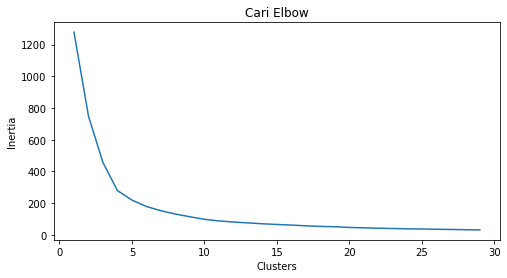

In [58]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(x=list(range(1, 30)), y=clusters, ax=ax)
ax.set_title('Cari Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

C:\Users\Fajri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


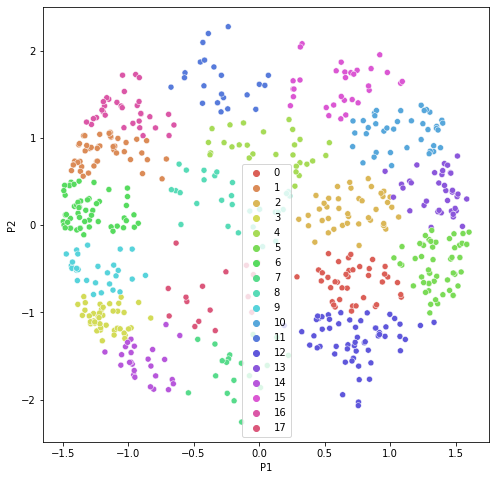

In [88]:
km5 = KMeans(n_clusters=18).fit(X_pca)

X = km5.labels_
 
plt.figure(figsize=(8,8))
sns.scatterplot(X_pca['P1'], X_pca['P2'], hue=X,
                palette=sns.color_palette('hls', 18))
plt.show()